# Übung zu logistischer Regression

## Marks

Laden sie die Datei marks.txt aus dem gitlab-Repo und plotten Sie die 2-dimensionalen Merkmale. 
Färben Sie die Punkte der beiden Klassen unterschiedlich ein.
Die Datei enthält Datenpunkte von Studierenden. Die Merkmale entsprechen den Scores in zwei Prüfungen. 
Die zwei Klassen entsprechen ob eine Studierende für das nächste Semester zugelassen wurde oder nicht.

Text(0.5, 0, 'x')

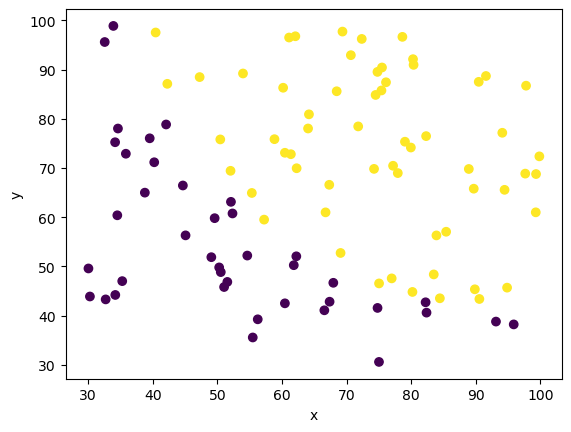

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

os.chdir("C:\\Users\\ABleicher\\Downloads")
file=open('marks.txt', 'r')

points=np.empty((0, 2))
classes=np.empty(0)
lines = file.readlines()
for l in lines:
    l=l.strip('\n')
    splitline=l.split(',')
    point=np.array([[float(splitline[0]), float(splitline[1])]])
    points=np.append(points, point, axis=0)
    classes=np.append(classes, int(splitline[2]))

x = points[:, 0]
y = points[:, 1]
plt.scatter(x,y, c=classes)
plt.ylabel("y")
plt.xlabel("x")

## Trainieren der Logistischen Regression

Trainieren Sie eine Logistische Regression. Die Daten sind dabei in train/test zu splitten

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as eval

(Xtr, Xte, ytr, yte) = train_test_split(points,classes)

clf = LogisticRegression(solver='liblinear')
clf.fit(Xtr, ytr)

e=clf.predict(Xte)
acc = eval.accuracy_score(yte, e)
print(acc)
print(eval.confusion_matrix(yte, e))

0.84
[[ 5  4]
 [ 0 16]]


Lassen Sie zusaetzliche eine LOO-Evaluation laufen

In [5]:
from sklearn.model_selection import LeaveOneOut
accuracies = []
loo=LeaveOneOut()
for train_indices, test_indices in loo.split(points, classes):
    clf.fit(points[train_indices], classes[train_indices])
    accuracies.append(clf.score(points[test_indices], classes[test_indices]))
print(np.average(accuracies))

0.84


# Logistic Regression different solver


Welche solver gibt es in SKLearn? Probieren Sie diese aus.
Vergleichen Sie die Fehlerraten.

In [4]:
def testSolver(solver):
    clf = LogisticRegression(solver=solver)
    clf.fit(Xtr, ytr)

    e=clf.predict(Xte)
    acc = eval.accuracy_score(yte, e)
    print(acc)
    print(eval.confusion_matrix(yte, e))
    
testSolver('lbfgs')
testSolver('newton-cg')
#testSolver('newton-cholesky')
testSolver('sag')
testSolver('saga')

"""For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;

‘liblinear’ is limited to one-versus-rest schemes.

‘newton-cholesky’ is a good choice for n_samples >> n_features, especially with one-hot encoded categorical features with rare categories. Note that it is limited to binary classification and the one-versus-rest reduction for multiclass classification. Be aware that the memory usage of this solver has a quadratic dependency on n_features because it explicitly computes the Hessian matrix."""

0.84
[[ 8  2]
 [ 2 13]]
0.84
[[ 8  2]
 [ 2 13]]
0.6
[[ 0 10]
 [ 0 15]]
0.6
[[ 0 10]
 [ 0 15]]


C:\Users\ABleicher\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ABleicher\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


'For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;\n\nFor multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;\n\n‘liblinear’ is limited to one-versus-rest schemes.\n\n‘newton-cholesky’ is a good choice for n_samples >> n_features, especially with one-hot encoded categorical features with rare categories. Note that it is limited to binary classification and the one-versus-rest reduction for multiclass classification. Be aware that the memory usage of this solver has a quadratic dependency on n_features because it explicitly computes the Hessian matrix.'

# Mehrklassen Problem

Laden Sie den MNist-Datensatz und Trainieren bzw. Evaluieren Sie eine Logistische Regression aus SKLearn. Verwenden Sie die Train_Test_Split-Methodologie (75%,25%).

In [5]:
from sklearn.datasets import fetch_openml

print("Hell0")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print("Hello")


Hell0
Hello


In [6]:
print(X.shape)
print(y.shape)


(70000, 784)
(70000,)


In [7]:
print("Da")
(Xtr, Xte, ytr, yte)=train_test_split(X,y,test_size=0.25)
clf = LogisticRegression(solver='saga')
print("Hier")
clf.fit(Xtr, ytr)
print("Done fitting")
e=clf.predict(Xte)

acc=eval.accuracy_score(yte, e)
print(acc)
print(eval.confusion_matrix(yte, e))

Da
Hier
Done fitting
0.9189142857142857
[[1704    0    9    2    1   16   14    3   18    3]
 [   0 1977    7    6    2    3    3    6   20    4]
 [   8   26 1533   39   21    8   17   22   50   11]
 [   7    7   47 1648    0   52    4    7   39   22]
 [   3    6   12    3 1560    1   19   10   10   56]
 [  25    6    9   57   16 1349   34    6   49   13]
 [  11    6    9    2   12   28 1647    2    9    2]
 [   5    7   22   10    9    2    0 1696    6   65]
 [  16   35   26   40    7   54    8    3 1412   27]
 [  10    7    7   14   42   13    1   54    9 1555]]


C:\Users\ABleicher\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Zum Vergleich: Trainieren Sie einen KNN auf diesen Daten und interpretieren sie die Ergebnisse.

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=83) #Startwert knn sqrt(7000)
knn.fit(Xtr, ytr)
print("Done fitting")
e=knn.predict(Xte)
print(eval.accuracy_score(yte, e))
print(eval.confusion_matrix(yte, e))

Done fitting


C:\Users\ABleicher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9401714285714285
[[1635    2    2    1    1    3    9    1    0    1]
 [   0 1971    7    3    5    0    3    2    0    2]
 [  26   55 1520    9    3    3   10   58   14    3]
 [   3   23    8 1746    1   26    4   24   18   25]
 [   2   49    0    0 1617    0    9    2    2   65]
 [   3   18    1   26    1 1387   14    2    5   23]
 [  16    9    0    0    3    6 1758    0    0    0]
 [   3   53    1    0    4    1    0 1661    0   30]
 [  14   52    1   44    9   37    8   10 1488   41]
 [   9   21    4   23   14    3    2   49    3 1670]]


## AddOn: GradientDescent für Logistische Regression

Implementieren Sie den Gradientenabstieg für die Logistische Regression

In [20]:
import random

class MyLogReg:
    
    def __init__(self, epochs):
        self.w = np.empty([0])
        self.e = epochs
    
    def fit(self, X, Y):
        for i in range(X.shape[1]):
            self.w = np.append(self.w, random.random()) # Initialisieren von w1..wn
        lr = 1/(Y[0]-self.predict(X[0]))    
        for i in range(self.e):
            yPred=np.empty([0])
            for x in X:
                yPred = np.append(yPred, self.predict(x))
            diffY = Y-yPred
            deltaW = (-1/len(X))*np.sum(np.dot(diffY, X))
            self.w = self.w - lr*deltaW

    def predict(self, X):
        return 1/(1+np.exp(-np.dot(X, self.w))) #Veränderung: Vorhersage jetzt mit Sigmoid Funktion
        


In [26]:
from sklearn.datasets import load_iris

iris=load_iris()
X=iris['data']
y=iris['target']

y=y[:100]
X=X[:100]
(Xtr, Xte, ytr, yte)=train_test_split(X,y)

logReg = MyLogReg(500)
logReg.fit(Xtr, ytr)

e=logReg.predict(Xte)

print(eval.accuracy_score(yte, e))
print(eval.confusion_matrix(yte, e))

C:\Users\ABleicher\AppData\Local\Temp\ipykernel_11792\1448041349.py:22: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-np.dot(X, self.w))) #Veränderung: Vorhersage jetzt mit Sigmoid Funktion


0.52
[[13  0]
 [12  0]]


In [9]:




##Stochastik

import scipy.integrate as integrate
from scipy.stats import beta
from scipy.special import gamma
import numpy as np
from math import e


i = integrate.quad(lambda x: beta.pdf(x, 181,151), -np.inf, 0.5)
print(i[0])
print(1-i[0])

def expo(n):
    return e**n
def gammaD(x, a, b):
    return ((b**a)/gamma(a))*(x**(a-1))*(expo(-b*x))


i = integrate.quad(lambda x: gammaD(x, 138.6,32), -np.inf, 0.5)
print(i[0])
print(1-i[0])

0.04950588855554757
0.9504941114444524


OverflowError: complex exponentiation